In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
# Constants
Q = 10    # source emission rate (kg/s)
U = 3     # wind speed (m/s)
H = 0
min_concentration = 9*10**(-7)
x0, y0, z0 = 500, 0, 0

# Grid
rmax = 4000  # size of domain in r (m)
ymax = 2000  # size of domain in y (m)
N = 2000     # number of plotting points

In [4]:
# Определение устойчивости атмосферы
def classify_atmospheric_stability(U: int):
    ''''''
    if U < 2:
        return "B"
    elif U < 5:
        return "C"
    else:
        return "D"

In [5]:
a1 = 0.112
a2 = 5.38**(-4)
b1 = 1.06

c1 = 7.37
c2 = 4.29*10**3
d1 = -0.0957
d2 = -0.6

c3, c4 = 0.33, 1.5
def calc_dy(x):
    return (c3*x)/((1+c4*10**(-4)*x)**(1/2))

def F(x):
    if z0 <= 0.1:
        return np.log(c1*(x**d1)*(1 + (c2*x**d2)**(-1)))
    else:
        return np.log(c1*(x**d1)*((1 + c2*x**d2)**(-1)))

def g(x):
    return (a1*x**b1)/(1+a2*x**d2)

vg = 0

def calc_dz(x):
    return (F(x)*g(x))/((1 + vg**2)**(1/2))

In [6]:
def gauss_func(x, y, z, atmospheric_stability):
    
    dy, dz = calc_dy(x), calc_dz(x)#calculate_plume_dispersion(x, atmospheric_stability)

    a = Q/(2*np.pi*U*dy*dz)
    b = np.exp((-(y-y0)**2)/(2*dy**2))
    c = np.exp((-(z-H)**2)/(2*dz**2))
    d = np.exp((-(z+H)**2)/(2*dz**2))
    return a*b*(c+d)

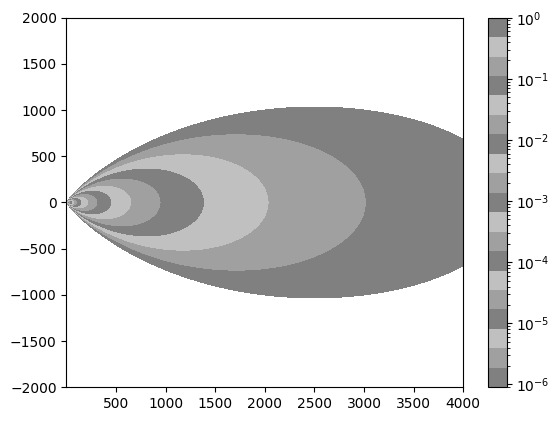

9.036614285457137e-07
0.0


In [7]:
lev = list(np.geomspace(min_concentration, 1, 20))
atmospheric_stability = classify_atmospheric_stability(U)

rr, yy = np.meshgrid(np.linspace(0.005, rmax, N), np.linspace(-ymax, ymax, 2*N))
cc = gauss_func(rr,yy, 1, atmospheric_stability)

cs = plt.contourf(rr, yy, cc, lev, colors=['#808080', '#A0A0A0', '#C0C0C0'])
plt.axis('off')
plt.savefig('test.jpg', dpi=300, bbox_inches='tight', facecolor="black")
plt.axis('on')
cbar = plt.colorbar()
cbar.ax.set_yscale('log')
plt.show()
print(cc[1000][1000])
print(cc[1000][0])


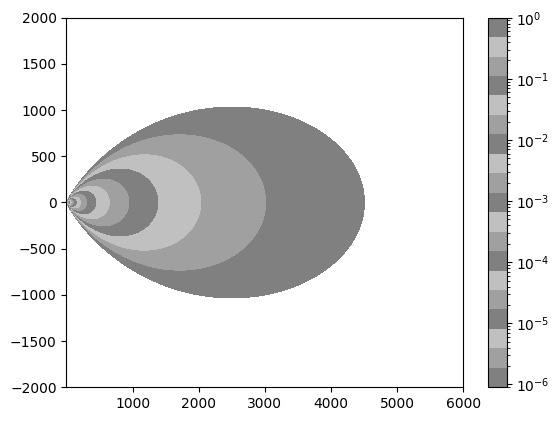

9.004923605829151e-07
0.0


In [8]:
rmax = 6000
lev = list(np.geomspace(min_concentration, 1, 20))

rr, yy = np.meshgrid(np.linspace(0.005, rmax, N), np.linspace(-ymax, ymax, 2*N))
cc = gauss_func(rr,yy, 1, atmospheric_stability)

cs = plt.contourf(rr, yy, cc, lev, colors=['#808080', '#A0A0A0', '#C0C0C0'])
plt.axis('off')
plt.savefig('test.jpg', dpi=300, bbox_inches='tight', facecolor="black")
plt.axis('on')
cbar = plt.colorbar()
cbar.ax.set_yscale('log')
plt.show()
print(cc[1000][1000])
print(cc[1000][0])


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
SOURCE_EMISSION_RATE = 10  # source emission rate (kg/s)
WIND_SPEED =            3  # wind speed (m/s)
RELEASE_HEIGHT =        0  # release height (m)
MIN_CONCENTRATION =    7.72850010233e-6  # minimum concentration threshold
SOURCE_POSITION =      (500, 0, 0)  # (x0, y0, z0)

# Grid parameters
DOMAIN_SIZE_X = 6000  # size of domain in x (m)
DOMAIN_SIZE_Y = 1500  # size of domain in y (m)
NUM_POINTS =    2000  # number of plotting points

# Dispersion coefficients for atmospheric stability classes
DISPERSION_COEFFICIENTS = {
    "B": {"sigma_y": (0.16, 0.0001), "sigma_z": (0.12, 0.0)},
    "C": {"sigma_y": (0.11, 0.0001), "sigma_z": (0.08, 0.0002)},
    "D": {"sigma_y": (0.08, 0.0001), "sigma_z": (0.06, 0.0015)},
}

def determine_atmospheric_stability(wind_speed: float) -> str:
    """
    Determine the atmospheric stability class based on wind speed.
    
    :param wind_speed: Wind speed in m/s.
    :return: Atmospheric stability class ("B", "C", or "D").
    """
    if wind_speed < 2:
        return "B"
    elif wind_speed < 5:
        return "C"
    else:
        return "D"

def calculate_plume_dispersion(x: float, stability_class: str) -> tuple[float, float]:
    """
    Calculate horizontal (sigma_y) and vertical (sigma_z) dispersion coefficients.
    
    :param x: Distance from the source in meters.
    :param stability_class: Atmospheric stability class ("B", "C", or "D").
    :return: Tuple of (sigma_y, sigma_z) dispersion coefficients.
    """

    coeff = DISPERSION_COEFFICIENTS.get(stability_class)
    if not coeff:
        raise ValueError(f"Unknown stability class: {stability_class}")
    
    a_y, b_y = coeff["sigma_y"]
    a_z, b_z = coeff["sigma_z"]
    
    sigma_y = a_y * x / np.sqrt(1 + b_y * x)
    sigma_z = a_z * x / np.sqrt(1 + b_z * x)
    
    return sigma_y, sigma_z

def calculate_concentration(x: float, y: float, z: float, stability_class: str) -> float:
    """
    Calculate the concentration of the pollutant using the Gaussian plume model.
    
    :param x: Distance downwind from the source (m).
    :param y: Crosswind distance from the centerline (m).
    :param z: Vertical distance from the ground (m).
    :param stability_class: Atmospheric stability class ("A"-"F").

    :return: Concentration of the pollutant in (x, y, z).
    """

    sigma_y, sigma_z = calculate_plume_dispersion(x, stability_class)
    
    term1 = SOURCE_EMISSION_RATE / (2 * np.pi * WIND_SPEED * sigma_y * sigma_z)
    term2 = np.exp(-((y - SOURCE_POSITION[1]) ** 2) / (2 * sigma_y ** 2))
    term3 = np.exp(-((z - RELEASE_HEIGHT) ** 2)     / (2 * sigma_z ** 2))
    term4 = np.exp(-((z + RELEASE_HEIGHT) ** 2)     / (2 * sigma_z ** 2))

    return term1*term2*(term3 + term4)



# Main script
stability_class = determine_atmospheric_stability(WIND_SPEED)

# Create grid
x_grid, y_grid = np.meshgrid(
    np.linspace(0.005, DOMAIN_SIZE_X, NUM_POINTS),
    np.linspace(-DOMAIN_SIZE_Y, DOMAIN_SIZE_Y, 2 * NUM_POINTS)
)


In [10]:
# Calculate concentration
concentration = calculate_concentration(x_grid, y_grid, 1, stability_class)

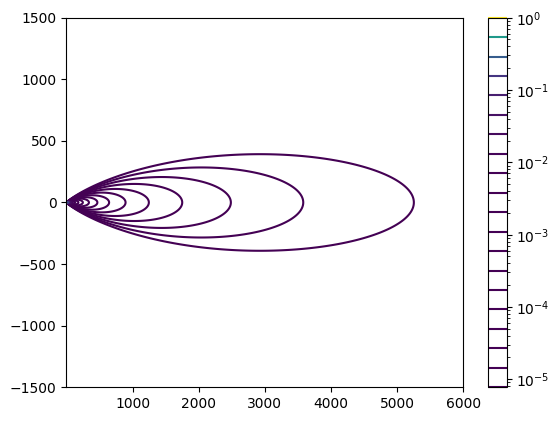

In [11]:
# Plotting
levels = list(np.geomspace(MIN_CONCENTRATION, 1, 20))
plt.contour(x_grid, y_grid, concentration, levels, cmap='viridis')  # Используем контурные линии и цветовую карту
plt.axis('off')
plt.savefig('plume_dispersion.jpg', dpi=300, bbox_inches='tight', facecolor="black")
plt.axis('on')
cbar = plt.colorbar()
cbar.ax.set_yscale('log')
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_22464\3827146777.py:4: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(x_grid, y_grid, concentration, levels=levels, cmap='plasma', norm=LogNorm())  # Используем LogNorm для нормализации


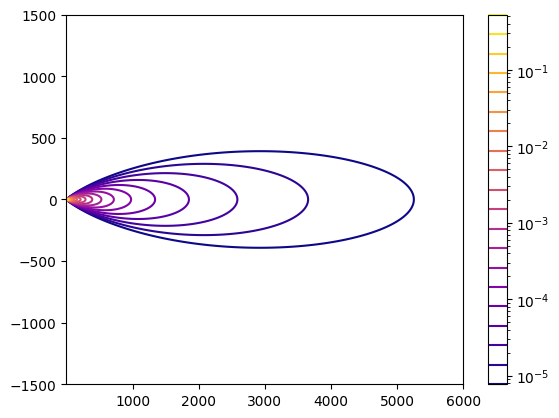

In [12]:
from matplotlib.colors import LogNorm
# Plotting
levels = np.geomspace(MIN_CONCENTRATION, concentration.max(), 20)  # Логарифмические уровни
plt.contour(x_grid, y_grid, concentration, levels=levels, cmap='plasma', norm=LogNorm())  # Используем LogNorm для нормализации
cbar = plt.colorbar()
cbar.ax.set_yscale('log')
plt.show()


C:\Users\andre\AppData\Local\Temp\ipykernel_22464\2382934550.py:4: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(x_grid, y_grid, concentration, levels=levels, cmap='plasma', norm=LogNorm())  # Используем LogNorm для нормализации


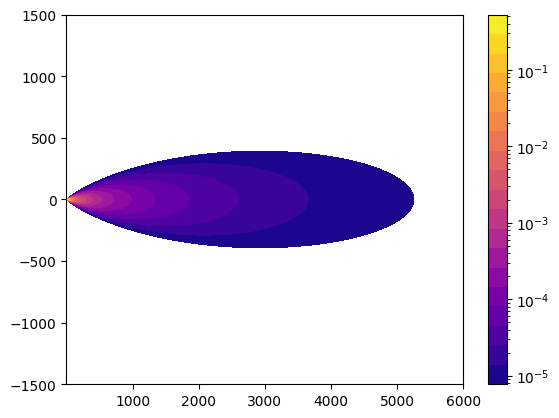

In [13]:
from matplotlib.colors import LogNorm
# Plotting
levels = np.geomspace(MIN_CONCENTRATION, concentration.max(), 20)  # Логарифмические уровни
plt.contourf(x_grid, y_grid, concentration, levels=levels, cmap='plasma', norm=LogNorm())  # Используем LogNorm для нормализации
cbar = plt.colorbar()
cbar.ax.set_yscale('log')
plt.show()


C:\Users\andre\AppData\Local\Temp\ipykernel_22464\1995027138.py:3: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(


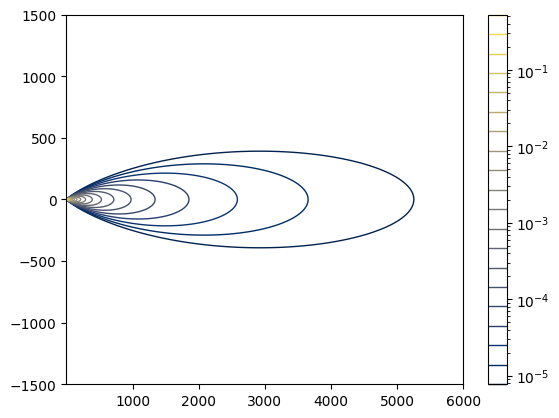

In [24]:
# Plotting
levels = np.geomspace(MIN_CONCENTRATION, concentration.max(), 20)  # Логарифмические уровни
plt.contour(
    x_grid, y_grid, concentration,
    levels=levels,
    cmap='cividis',  # Цветовая карта
    norm=LogNorm(vmin=MIN_CONCENTRATION, vmax=concentration.max()),  # Логарифмическая нормализация
    linewidths=1  # Толщина линий
)
cbar = plt.colorbar()
cbar.ax.set_yscale('log')
plt.show()